# Imports

In [46]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np

from sklearn import svm, tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

In [2]:
data = pd.read_csv("SkillCraft.csv")

In [3]:
data.drop(columns = 'GameID', inplace = True)

In [4]:
y = data['LeagueIndex']
X = data.drop(columns = 'LeagueIndex')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 42)

In [6]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), 
                              columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), 
                              columns = X.columns, index = X_test.index)

In [7]:
y_train = keras.utils.to_categorical(y_train, 8)
y_test = keras.utils.to_categorical(y_test, 8)

In [8]:
X_train_scaled.head()

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,0.072284,-0.803127,-0.016021,-1.318972,-0.597681,-0.107522,0.705077,0.709327,-0.508293,-0.518530,0.780383,1.146459,-1.471608,-0.682378,-0.811311,-0.288292,-0.533826,-0.549380
1,1.005188,-0.304914,-0.027622,-0.634379,-0.487117,0.562755,-0.565802,-0.576186,1.169240,-0.107258,0.446273,0.050650,-0.645243,-1.214921,-0.373558,-1.368403,-0.533826,-0.549380
2,-0.860620,1.023655,-0.013121,-0.284760,-0.124498,1.111023,0.281450,-0.121246,-0.559717,-0.332267,-0.736466,-0.450454,-0.163240,-1.348057,0.059796,-0.288292,-0.533826,0.129219
3,1.471640,0.359371,-0.013121,1.006636,-0.198806,2.036444,1.128703,3.517604,-0.096717,-1.975969,-0.334124,1.302528,8.567335,-1.747464,-0.256817,-1.368403,-0.533826,-0.549380
4,-1.093846,-0.138843,-0.020371,-1.177554,-0.762346,-1.001491,-0.565802,-0.576186,-0.030296,0.053997,1.532397,0.038622,-1.444994,0.382708,-1.176449,0.251764,-0.533826,-0.139707


In [9]:
model_1 = Sequential()
model_1.add(Dense(64, activation='tanh', input_shape=(18,)))
model_1.add(Dense(8, activation='softmax'))

In [10]:
model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
results_1 = model_1.fit(X_train_scaled, y_train, epochs=50, batch_size=500, validation_data=(X_test_scaled, y_test))

Train on 2336 samples, validate on 1002 samples
Epoch 1/50
2336/2336 [==============================] - 0s 51us/step - loss: 2.5754 - acc: 0.0599 - val_loss: 2.5883 - val_acc: 0.0519
Epoch 2/50
2336/2336 [==============================] - 0s 8us/step - loss: 2.5106 - acc: 0.0685 - val_loss: 2.5260 - val_acc: 0.0529
Epoch 3/50
2336/2336 [==============================] - 0s 8us/step - loss: 2.4508 - acc: 0.0732 - val_loss: 2.4685 - val_acc: 0.0629
Epoch 4/50
2336/2336 [==============================] - 0s 8us/step - loss: 2.3956 - acc: 0.0792 - val_loss: 2.4151 - val_acc: 0.0659
Epoch 5/50
2336/2336 [==============================] - 0s 8us/step - loss: 2.3445 - acc: 0.0886 - val_loss: 2.3654 - val_acc: 0.0788
Epoch 6/50
2336/2336 [==============================] - 0s 8us/step - loss: 2.2970 - acc: 0.0985 - val_loss: 2.3191 - val_acc: 0.0928
Epoch 7/50
2336/2336 [==============================] - 0s 8us/step - loss: 2.2531 - acc: 0.1122 - val_loss: 2.2758 - val_acc: 0.1078
Epoch 8/50
23

In [12]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

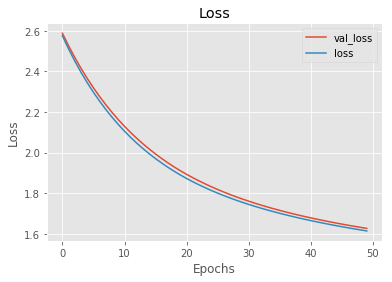

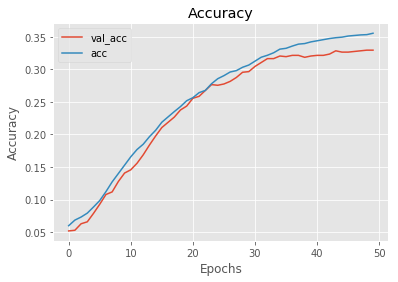

In [13]:
visualize_training_results(results_1)

In [14]:
model_2 = Sequential()
model_2.add(Dense(64, activation='tanh', input_shape=(18,)))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(8, activation='softmax'))

In [15]:
model_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [16]:
results_2 = model_2.fit(X_train_scaled, y_train, epochs=200, batch_size=50, validation_data=(X_test_scaled, y_test))

Train on 2336 samples, validate on 1002 samples
Epoch 1/200
2336/2336 [==============================] - 0s 84us/step - loss: 1.9552 - acc: 0.2568 - val_loss: 1.8550 - val_acc: 0.3094
Epoch 2/200
2336/2336 [==============================] - 0s 37us/step - loss: 1.7962 - acc: 0.3193 - val_loss: 1.7394 - val_acc: 0.3403
Epoch 3/200
2336/2336 [==============================] - 0s 32us/step - loss: 1.6972 - acc: 0.3532 - val_loss: 1.6625 - val_acc: 0.3423
Epoch 4/200
2336/2336 [==============================] - 0s 31us/step - loss: 1.6292 - acc: 0.3686 - val_loss: 1.6070 - val_acc: 0.3613
Epoch 5/200
2336/2336 [==============================] - 0s 30us/step - loss: 1.5790 - acc: 0.3677 - val_loss: 1.5655 - val_acc: 0.3733
Epoch 6/200
2336/2336 [==============================] - 0s 29us/step - loss: 1.5407 - acc: 0.3724 - val_loss: 1.5330 - val_acc: 0.3743
Epoch 7/200
2336/2336 [==============================] - 0s 30us/step - loss: 1.5105 - acc: 0.3797 - val_loss: 1.5079 - val_acc: 0.3772


2336/2336 [==============================] - 0s 32us/step - loss: 1.3108 - acc: 0.4396 - val_loss: 1.3578 - val_acc: 0.3982
Epoch 61/200
2336/2336 [==============================] - 0s 29us/step - loss: 1.3101 - acc: 0.4371 - val_loss: 1.3573 - val_acc: 0.3952
Epoch 62/200
2336/2336 [==============================] - 0s 28us/step - loss: 1.3093 - acc: 0.4384 - val_loss: 1.3563 - val_acc: 0.3952
Epoch 63/200
2336/2336 [==============================] - 0s 27us/step - loss: 1.3087 - acc: 0.4414 - val_loss: 1.3556 - val_acc: 0.3972
Epoch 64/200
2336/2336 [==============================] - 0s 27us/step - loss: 1.3077 - acc: 0.4409 - val_loss: 1.3554 - val_acc: 0.3972
Epoch 65/200
2336/2336 [==============================] - 0s 29us/step - loss: 1.3070 - acc: 0.4392 - val_loss: 1.3558 - val_acc: 0.3952
Epoch 66/200
2336/2336 [==============================] - 0s 35us/step - loss: 1.3064 - acc: 0.4431 - val_loss: 1.3544 - val_acc: 0.3962
Epoch 67/200
2336/2336 [==============================

Epoch 120/200
2336/2336 [==============================] - 0s 31us/step - loss: 1.2739 - acc: 0.4580 - val_loss: 1.3503 - val_acc: 0.3972
Epoch 121/200
2336/2336 [==============================] - 0s 29us/step - loss: 1.2732 - acc: 0.4598 - val_loss: 1.3493 - val_acc: 0.3962
Epoch 122/200
2336/2336 [==============================] - 0s 30us/step - loss: 1.2728 - acc: 0.4538 - val_loss: 1.3495 - val_acc: 0.3922
Epoch 123/200
2336/2336 [==============================] - 0s 32us/step - loss: 1.2722 - acc: 0.4589 - val_loss: 1.3498 - val_acc: 0.3912
Epoch 124/200
2336/2336 [==============================] - 0s 31us/step - loss: 1.2715 - acc: 0.4593 - val_loss: 1.3499 - val_acc: 0.3922
Epoch 125/200
2336/2336 [==============================] - 0s 31us/step - loss: 1.2710 - acc: 0.4568 - val_loss: 1.3499 - val_acc: 0.3962
Epoch 126/200
2336/2336 [==============================] - 0s 33us/step - loss: 1.2706 - acc: 0.4649 - val_loss: 1.3504 - val_acc: 0.3952
Epoch 127/200
2336/2336 [=========

2336/2336 [==============================] - 0s 45us/step - loss: 1.2401 - acc: 0.4790 - val_loss: 1.3511 - val_acc: 0.3932
Epoch 180/200
2336/2336 [==============================] - 0s 40us/step - loss: 1.2395 - acc: 0.4807 - val_loss: 1.3528 - val_acc: 0.3922
Epoch 181/200
2336/2336 [==============================] - 0s 32us/step - loss: 1.2390 - acc: 0.4846 - val_loss: 1.3527 - val_acc: 0.3902
Epoch 182/200
2336/2336 [==============================] - 0s 35us/step - loss: 1.2382 - acc: 0.4816 - val_loss: 1.3514 - val_acc: 0.3992
Epoch 183/200
2336/2336 [==============================] - 0s 36us/step - loss: 1.2379 - acc: 0.4799 - val_loss: 1.3513 - val_acc: 0.3952
Epoch 184/200
2336/2336 [==============================] - 0s 49us/step - loss: 1.2373 - acc: 0.4854 - val_loss: 1.3526 - val_acc: 0.3932
Epoch 185/200
2336/2336 [==============================] - 0s 42us/step - loss: 1.2365 - acc: 0.4850 - val_loss: 1.3518 - val_acc: 0.3912
Epoch 186/200
2336/2336 [=======================

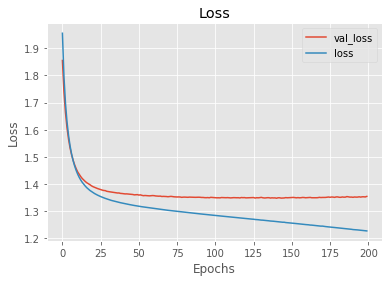

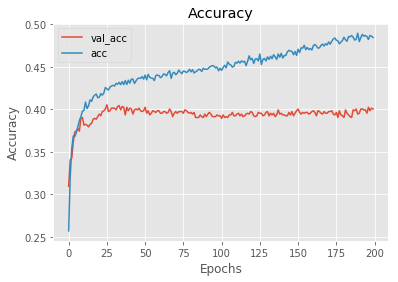

In [17]:
visualize_training_results(results_2)

In [18]:
y_group = y.map(lambda x: 0 if x in [1, 2, 3] else 
                1 if x in [4, 5] else 2)

In [19]:
X_train, X_test, y_group_train, y_group_test = train_test_split(
    X, y_group, test_size = 0.30, random_state = 42)

In [20]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), 
                              columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), 
                              columns = X.columns, index = X_test.index)

In [21]:
y_train = keras.utils.to_categorical(y_group_train, 3)
y_test = keras.utils.to_categorical(y_group_test, 3)

In [22]:
model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_shape=(18,)))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(3, activation='softmax'))

In [23]:
model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [24]:
results_3 = model_3.fit(X_train_scaled, y_train, epochs=200, batch_size=50, validation_data=(X_test_scaled, y_test))

Train on 2336 samples, validate on 1002 samples
Epoch 1/200
2336/2336 [==============================] - 0s 100us/step - loss: 1.0355 - acc: 0.4662 - val_loss: 0.9590 - val_acc: 0.5399
Epoch 2/200
2336/2336 [==============================] - 0s 39us/step - loss: 0.8939 - acc: 0.5839 - val_loss: 0.8841 - val_acc: 0.5828
Epoch 3/200
2336/2336 [==============================] - 0s 32us/step - loss: 0.8302 - acc: 0.6246 - val_loss: 0.8476 - val_acc: 0.5908
Epoch 4/200
2336/2336 [==============================] - 0s 37us/step - loss: 0.7938 - acc: 0.6451 - val_loss: 0.8182 - val_acc: 0.6188
Epoch 5/200
2336/2336 [==============================] - 0s 52us/step - loss: 0.7707 - acc: 0.6575 - val_loss: 0.8034 - val_acc: 0.6188
Epoch 6/200
2336/2336 [==============================] - 0s 57us/step - loss: 0.7552 - acc: 0.6635 - val_loss: 0.7926 - val_acc: 0.6257
Epoch 7/200
2336/2336 [==============================] - 0s 45us/step - loss: 0.7450 - acc: 0.6652 - val_loss: 0.7814 - val_acc: 0.6327

2336/2336 [==============================] - 0s 30us/step - loss: 0.6635 - acc: 0.7012 - val_loss: 0.7292 - val_acc: 0.6497
Epoch 61/200
2336/2336 [==============================] - 0s 31us/step - loss: 0.6631 - acc: 0.7003 - val_loss: 0.7302 - val_acc: 0.6457
Epoch 62/200
2336/2336 [==============================] - 0s 32us/step - loss: 0.6622 - acc: 0.7021 - val_loss: 0.7286 - val_acc: 0.6477
Epoch 63/200
2336/2336 [==============================] - 0s 28us/step - loss: 0.6616 - acc: 0.6973 - val_loss: 0.7282 - val_acc: 0.6527
Epoch 64/200
2336/2336 [==============================] - 0s 31us/step - loss: 0.6610 - acc: 0.7033 - val_loss: 0.7307 - val_acc: 0.6497
Epoch 65/200
2336/2336 [==============================] - 0s 31us/step - loss: 0.6604 - acc: 0.7033 - val_loss: 0.7270 - val_acc: 0.6497
Epoch 66/200
2336/2336 [==============================] - 0s 35us/step - loss: 0.6595 - acc: 0.6982 - val_loss: 0.7300 - val_acc: 0.6477
Epoch 67/200
2336/2336 [==============================

Epoch 120/200
2336/2336 [==============================] - 0s 30us/step - loss: 0.6272 - acc: 0.7140 - val_loss: 0.7251 - val_acc: 0.6517
Epoch 121/200
2336/2336 [==============================] - 0s 31us/step - loss: 0.6270 - acc: 0.7145 - val_loss: 0.7241 - val_acc: 0.6507
Epoch 122/200
2336/2336 [==============================] - 0s 35us/step - loss: 0.6266 - acc: 0.7179 - val_loss: 0.7281 - val_acc: 0.6437
Epoch 123/200
2336/2336 [==============================] - 0s 31us/step - loss: 0.6256 - acc: 0.7166 - val_loss: 0.7289 - val_acc: 0.6467
Epoch 124/200
2336/2336 [==============================] - 0s 33us/step - loss: 0.6253 - acc: 0.7132 - val_loss: 0.7311 - val_acc: 0.6477
Epoch 125/200
2336/2336 [==============================] - 0s 32us/step - loss: 0.6247 - acc: 0.7158 - val_loss: 0.7217 - val_acc: 0.6497
Epoch 126/200
2336/2336 [==============================] - 0s 35us/step - loss: 0.6246 - acc: 0.7170 - val_loss: 0.7269 - val_acc: 0.6507
Epoch 127/200
2336/2336 [=========

2336/2336 [==============================] - 0s 30us/step - loss: 0.5939 - acc: 0.7295 - val_loss: 0.7334 - val_acc: 0.6497
Epoch 180/200
2336/2336 [==============================] - 0s 28us/step - loss: 0.5928 - acc: 0.7333 - val_loss: 0.7357 - val_acc: 0.6527
Epoch 181/200
2336/2336 [==============================] - 0s 31us/step - loss: 0.5924 - acc: 0.7277 - val_loss: 0.7350 - val_acc: 0.6497
Epoch 182/200
2336/2336 [==============================] - 0s 31us/step - loss: 0.5922 - acc: 0.7316 - val_loss: 0.7299 - val_acc: 0.6487
Epoch 183/200
2336/2336 [==============================] - 0s 29us/step - loss: 0.5910 - acc: 0.7303 - val_loss: 0.7316 - val_acc: 0.6497
Epoch 184/200
2336/2336 [==============================] - 0s 34us/step - loss: 0.5905 - acc: 0.7337 - val_loss: 0.7298 - val_acc: 0.6497
Epoch 185/200
2336/2336 [==============================] - 0s 30us/step - loss: 0.5902 - acc: 0.7320 - val_loss: 0.7301 - val_acc: 0.6507
Epoch 186/200
2336/2336 [=======================

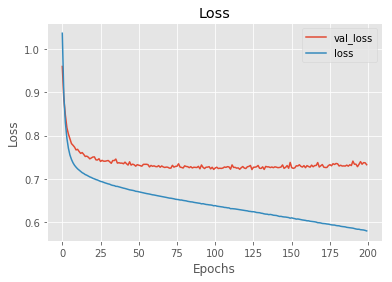

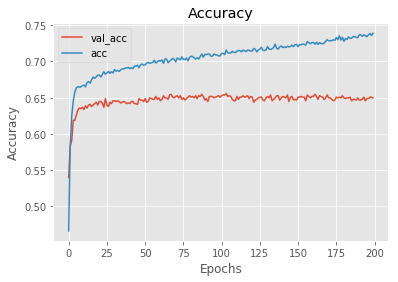

In [25]:
visualize_training_results(results_3)

In [73]:
model_4 = Sequential()
model_4.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(18,)))
model_4.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model_4.add(Dense(3, activation='softmax'))

In [74]:
model_4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [75]:
results_4 = model_4.fit(X_train_scaled, y_train, epochs=100, batch_size=25, validation_data=(X_test_scaled, y_test))

Train on 2336 samples, validate on 1002 samples
Epoch 1/100
2336/2336 [==============================] - 1s 364us/step - loss: 1.3603 - acc: 0.5103 - val_loss: 1.2692 - val_acc: 0.5479
Epoch 2/100
2336/2336 [==============================] - 0s 85us/step - loss: 1.1865 - acc: 0.6220 - val_loss: 1.1996 - val_acc: 0.5858
Epoch 3/100
2336/2336 [==============================] - 0s 88us/step - loss: 1.1345 - acc: 0.6417 - val_loss: 1.1575 - val_acc: 0.6058
Epoch 4/100
2336/2336 [==============================] - 0s 128us/step - loss: 1.1035 - acc: 0.6592 - val_loss: 1.1366 - val_acc: 0.6128
Epoch 5/100
2336/2336 [==============================] - 0s 73us/step - loss: 1.0821 - acc: 0.6584 - val_loss: 1.1148 - val_acc: 0.6257
Epoch 6/100
2336/2336 [==============================] - 0s 81us/step - loss: 1.0657 - acc: 0.6657 - val_loss: 1.1030 - val_acc: 0.6277
Epoch 7/100
2336/2336 [==============================] - 0s 68us/step - loss: 1.0528 - acc: 0.6699 - val_loss: 1.0887 - val_acc: 0.634

2336/2336 [==============================] - 0s 70us/step - loss: 0.7997 - acc: 0.7042 - val_loss: 0.8698 - val_acc: 0.6467
Epoch 61/100
2336/2336 [==============================] - 0s 70us/step - loss: 0.7974 - acc: 0.7076 - val_loss: 0.8686 - val_acc: 0.6507
Epoch 62/100
2336/2336 [==============================] - 0s 86us/step - loss: 0.7952 - acc: 0.7059 - val_loss: 0.8656 - val_acc: 0.6487
Epoch 63/100
2336/2336 [==============================] - 0s 76us/step - loss: 0.7929 - acc: 0.7072 - val_loss: 0.8660 - val_acc: 0.6447
Epoch 64/100
2336/2336 [==============================] - 0s 74us/step - loss: 0.7907 - acc: 0.7068 - val_loss: 0.8605 - val_acc: 0.6447
Epoch 65/100
2336/2336 [==============================] - 0s 88us/step - loss: 0.7889 - acc: 0.7038 - val_loss: 0.8588 - val_acc: 0.6487
Epoch 66/100
2336/2336 [==============================] - 0s 72us/step - loss: 0.7866 - acc: 0.7046 - val_loss: 0.8586 - val_acc: 0.6487
Epoch 67/100
2336/2336 [==============================

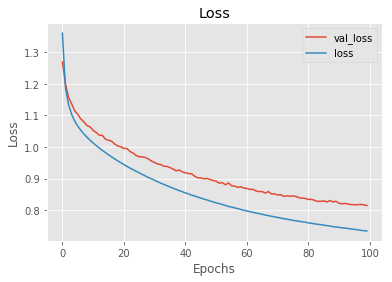

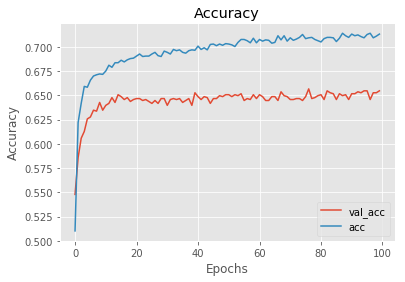

In [76]:
visualize_training_results(results_4)